In [1]:
%matplotlib inline

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage.io
from scipy.ndimage.filters import convolve

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Working with Images and Text
## Live Demos

In [3]:
tiger_image = skimage.io.imread("tiger.jpg")

In [4]:
type(tiger_image)

numpy.ndarray

In [5]:
tiger_image.shape

(600, 580, 3)

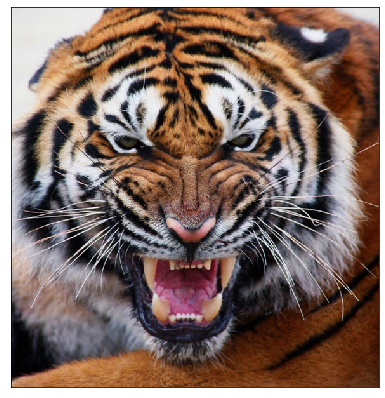

In [6]:
plt.figure(figsize = (7, 7))

plt.imshow(tiger_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
tiger_image[0][0]

array([223, 224, 226], dtype=uint8)

In [8]:
red_channel = tiger_image[:, :, 0]
green_channel = tiger_image[:, :, 1]
blue_channel = tiger_image[:, :, 2]

In [9]:
red_channel.shape

(600, 580)

In [10]:
red_channel.min()

0

In [11]:
red_channel.max()

255

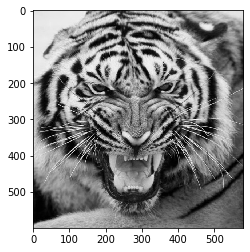

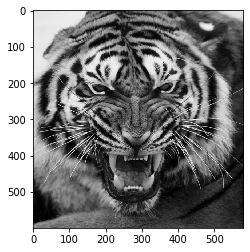

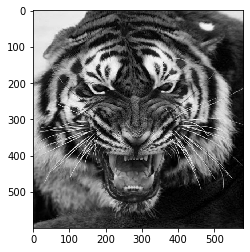

In [12]:
plt.imshow(red_channel, cmap = "gray")
plt.show()
plt.imshow(green_channel, cmap = "gray")
plt.show()
plt.imshow(blue_channel, cmap = "gray")
plt.show()

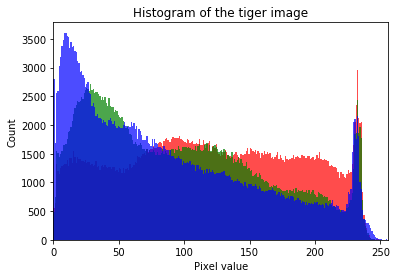

In [13]:
plt.title("Histogram of the tiger image")

plt.hist(red_channel.ravel(), bins = range(0, 256), color = "r", alpha = 0.7)
plt.hist(green_channel.ravel(), bins = range(0, 256), color = "g", alpha = 0.7)
plt.hist(blue_channel.ravel(), bins = range(0, 256), color = "b", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.xlim(0, 256)

plt.show()

In [14]:
mean_image = tiger_image.mean(axis = 2).astype(np.uint8)

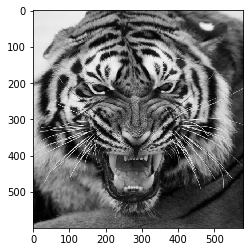

In [15]:
plt.imshow(mean_image, cmap = "gray")
plt.show()

In [16]:
image_gamma_corrected = 0.299 * red_channel + 0.587 * green_channel + 0.114 * blue_channel

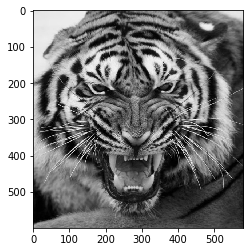

In [17]:
plt.imshow(image_gamma_corrected, cmap = "gray")
plt.show()

In [18]:
image_gray_arbitrary = 0.1 * red_channel + 0.1 * green_channel + 0.8 * blue_channel

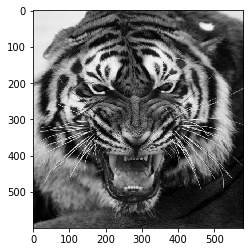

In [19]:
plt.imshow(image_gray_arbitrary, cmap = "gray")
plt.show()

In [20]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharpened_image = convolve(red_channel, kernel)

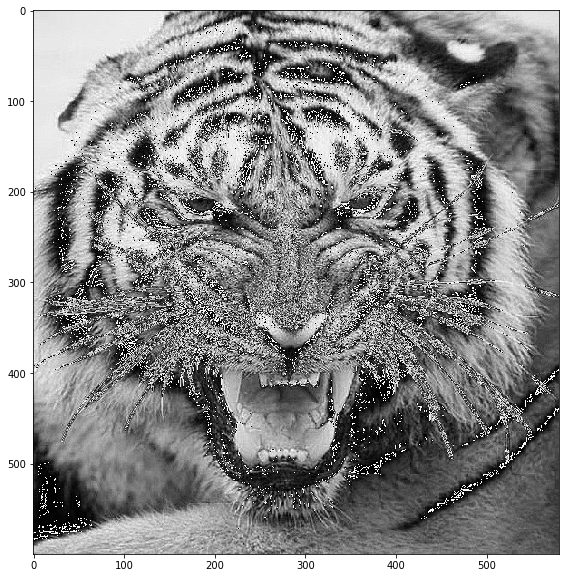

In [21]:
plt.figure(figsize = (10, 10))
plt.imshow(sharpened_image, cmap = "gray")
plt.show()

In [22]:
combined_image = (red_channel * 0.6 + sharpened_image * 0.4).astype(np.uint8)

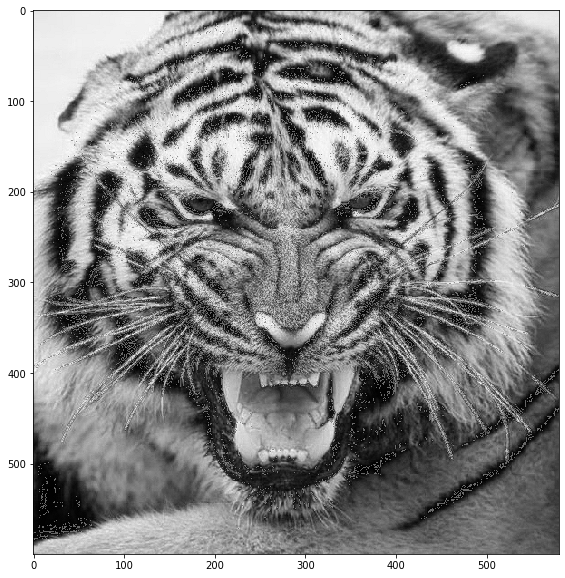

In [23]:
plt.figure(figsize = (10, 10))
plt.imshow(combined_image, cmap = "gray")
plt.show()

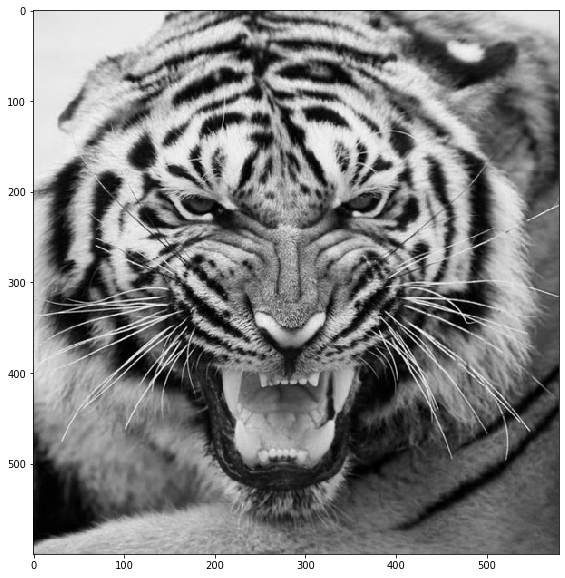

In [24]:
plt.figure(figsize = (10, 10))
plt.imshow(red_channel, cmap = "gray")
plt.show()

In [31]:
threshold = 20
is_smaller = red_channel <= threshold

In [32]:
thresholded_image = red_channel.copy()

In [33]:
thresholded_image[is_smaller] = 0
thresholded_image[~is_smaller] = 255

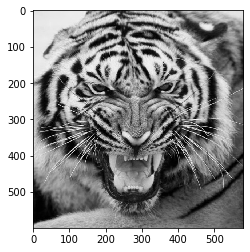

In [28]:
plt.imshow(red_channel, cmap = "gray")
plt.show()

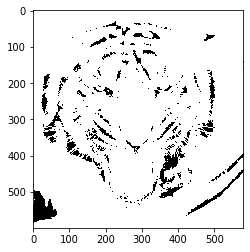

In [34]:
plt.imshow(thresholded_image, cmap = "gray")
plt.show()

In [35]:
alice = ""
with open("alice.txt", "r", encoding = "utf-8") as file:
    alice = file.read()

In [37]:
print(alice)2




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [38]:
type(alice)

str

In [44]:
counter = Counter(alice)

In [46]:
counter.most_common(40)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('c', 2843),
 ('g', 2766),
 ('w', 2725),
 (',', 2566),
 ('y', 2489),
 ('m', 2272),
 ('\n', 2266),
 ('f', 2259),
 ('p', 1805),
 ('’', 1768),
 ('b', 1638),
 ('.', 1217),
 ('k', 1209),
 ('‘', 1116),
 ('v', 945),
 ('I', 788),
 ('A', 674),
 ('T', 487),
 ('!', 451),
 ('—', 264),
 (':', 255),
 ('H', 246),
 ('W', 231),
 ('S', 226),
 ('-', 223),
 ('j', 222),
 ('D', 216)]

In [56]:
alice_words = re.split("\W+", alice)
alice_words = [word.lower() for word in alice_words]

In [57]:
word_counter = Counter(alice_words)

In [59]:
word_counter.most_common(10)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462)]

In [65]:
stop = set(stopwords.words("english"))

In [68]:
"alice" in stop

False

In [70]:
alice_meaningful_words = [word for word in alice_words if word not in stop]

In [72]:
counter_meaningful_words = Counter(alice_meaningful_words)

In [76]:
counter_meaningful_words.most_common(50)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58),
 ('mock', 57),
 ('tm', 57),
 ('hatter', 56),
 ('quite', 55),
 ('gryphon', 55),
 ('must', 54),
 ('rabbit', 53),
 ('think', 53),
 ('work', 53),
 ('much', 52),
 ('say', 51),
 ('first', 51),
 ('head', 50),
 ('go', 50),
 ('thing', 49),
 ('never', 48),
 ('voice', 48),
 ('come', 47),
 ('get', 46),
 ('1', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('mouse', 44),
 ('duchess', 42),
 ('round', 41),
 ('came', 40),
 ('two', 40),
 ('tone', 40),
 ('dormouse', 40)]

In [78]:
stemmer = PorterStemmer()

In [79]:
stemmer.stem("running")

'run'

In [80]:
stemmer.stem("runner")

'runner'

In [81]:
stemmer.stem("ran")

'ran'

In [82]:
alice_word_stems = [stemmer.stem(word) for word in alice_meaningful_words]

In [84]:
stem_counter = Counter(alice_word_stems)

In [85]:
stem_counter.most_common(20)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70)]

In [88]:
newsgroups = fetch_20newsgroups().data

In [90]:
newsgroups[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [91]:
len(newsgroups)

11314

In [95]:
tf_idf = TfidfVectorizer()

In [96]:
newsgroups_table = tf_idf.fit_transform(newsgroups)

In [97]:
newsgroups_table

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [98]:
11314 * 130107

1472030598

In [99]:
1787565 / (11314 * 130107)

0.001214353154362896

In [101]:
feature_names = tf_idf.get_feature_names()

In [104]:
doc = 0 # Change the index to view another document
feature_index = newsgroups_table[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [newsgroups_table[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

neighborhood 0.13157118714240987
your 0.04278499079283093
by 0.03770448563619875
brought 0.09353930598317124
il 0.09785515708314481
thanks 0.05511105154696676
mail 0.05989856888061599
please 0.055457031390147224
looking 0.06908779999621749
funky 0.1558717009157704
have 0.02921527992427867
you 0.05922294083277842
info 0.07313443922740179
whatever 0.08207027465330353
or 0.031889368795417566
history 0.08342748387969037
made 0.0633940918806495
production 0.10826904490745741
years 0.060622095889758885
specs 0.10844724822064673
engine 0.09714744057976722
name 0.07000411445838192
model 0.08844382496462173
tellme 0.17691750674853082
can 0.03431760442478462
know 0.042808253355525495
all 0.037098931990947055
body 0.08716420445779295
rest 0.08171219473190486
separate 0.09869734624201922
bumper 0.1328075333935896
front 0.08646962500270383
addition 0.09534869974107982
in 0.02245166215306426
small 0.07526015712540636
really 0.0566656180826706
were 0.049437556160455476
doors 0.11603642565244157
brick

In [106]:
word_counter.dsfgsfsd

AttributeError: 'Counter' object has no attribute 'dsfgsfsd'